# Automated Voigt Species Plots (VSP): SiIV

This code is able to take the component groups and turn it into a csv file that contains all the information about the Veeper fits. It then reduces the pandas data frame to just the fits of the galaxy and runs them through a function that returns the voigt fit and the velocities associated with them to make voigt species plots similar to those seen in Figure 3 of Werk et al. 2013 (https://iopscience.iop.org/article/10.1088/0067-0049/204/2/17/pdf)

Note: This code is meant to be run after the veeper_create-run-collate.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 14

# update various fontsizes to match
params = {'figure.figsize': (18, 12),
          'legend.fontsize': 11,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

import glob
import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList

In [3]:
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [4]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='SiIV')] 
#gal_df_J1101 

In [5]:
gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='SiIV')]
gal_df_J1159

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,...,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
31,31,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1393.7602,-0.00014,13.471,0.035,45.5,4.934,-18.759,3.436,...,-68.4444,68.4444,1393.246243,1393.882650,279,297,-0.00020,SiIV,b,--
32,32,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1402.7729,-0.00014,13.471,0.000,45.5,0.000,-18.759,0.000,...,-68.4444,68.4444,1402.255619,1402.896142,525,542,-0.00020,SiIV,b,--
33,33,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1393.7602,0.00291,12.731,0.124,20.0,10.033,-3.131,6.007,...,-53.6926,53.6926,1397.573139,1398.072381,397,411,0.00290,SiIV,c,--
34,34,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1402.7729,0.00291,12.731,0.000,20.0,0.000,-3.131,0.000,...,-53.6926,53.6926,1406.610495,1407.112966,644,657,0.00290,SiIV,c,--
35,35,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1393.7602,0.00334,13.051,0.089,53.3,14.700,-4.440,9.630,...,-97.3747,97.3747,1397.964328,1398.869735,408,433,0.00333,SiIV,c,--
36,36,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1402.7729,0.00334,13.051,0.000,53.3,0.000,-4.440,0.000,...,-97.3747,97.3747,1407.004214,1407.915475,654,679,0.00333,SiIV,c,--


In [12]:
gal_df_1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='SiIV')]
gal_df_J1051

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,...,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
0,0,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1393.7602,0.00415,13.110,0.068,17.800,4.745,6.094,2.990,...,-52.4764,52.4764,1399.300421,1399.788356,444,458,0.00417,SiIV,c,--
1,1,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1402.7729,0.00415,13.110,0.000,17.800,0.000,6.094,0.000,...,-52.4764,52.4764,1408.348947,1408.840036,691,704,0.00417,SiIV,c,--
2,2,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1393.7602,0.00448,13.504,0.035,35.298,4.077,-9.390,2.637,...,-62.9717,62.9717,1399.714496,1400.300017,456,472,0.00445,SiIV,a,--
3,3,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1402.7729,0.00448,13.504,0.000,35.298,0.000,-9.390,0.000,...,-62.9717,62.9717,1408.765699,1409.355006,702,718,0.00445,SiIV,a,--
26,26,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1393.7602,-0.00014,13.509,0.045,85.000,10.718,-11.718,7.440,...,-116.6142,116.6142,1393.016987,1394.101285,273,303,-0.00018,SiIV,b,--
27,27,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1402.7729,-0.00014,13.509,0.000,85.000,0.000,-11.718,0.000,...,-116.6142,116.6142,1402.024881,1403.116191,519,548,-0.00018,SiIV,b,--
28,28,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1393.7602,0.00635,13.078,0.082,31.300,8.167,14.452,5.565,...,-78.1315,78.1315,1402.240647,1402.967127,524,544,0.00639,SiIV,c,--
29,29,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1402.7729,0.00635,13.078,0.000,31.300,0.000,14.452,0.000,...,-78.1315,78.1315,1411.308186,1412.039363,772,791,0.00639,SiIV,c,--


In [6]:
gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='SiIV')] 
#gal_df_J1222

In [7]:
gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='SiIV')]
#gal_df_J1249

In [8]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='SiIV')] 
#gal_df_J1051 

In [9]:
gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='SiIV')]
#gal_df_J1123

In [10]:
gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='SiIV')]
#gal_df_J0246

In [11]:
gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='SiIV')] 
#gal_df_J1235

In [13]:
#Pull the parts from gal_df that I want/need for the fitting and plots 

#J1101 Values 
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
b_J1101 = np.array(gal_df_J1101['bval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
b_J1159 = np.array(gal_df_J1159['bval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
b_J1222 = np.array(gal_df_J1222['bval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
b_J1249 = np.array(gal_df_J1249['bval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
b_J1051 = np.array(gal_df_J1051['bval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
b_J1123 = np.array(gal_df_J1123['bval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
b_J0246 = np.array(gal_df_J0246['bval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
b_J1235 = np.array(gal_df_J1235['bval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

In [14]:
# Define constants

from astropy import constants as const
c = const.c.to('km/s').value #speed of light in km/s for velocity => redshift conversions 

# Load spectrum for plotting
ism = LineList('ISM')

#J1101
specfile_J1101 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101+1429/J1101+1429_nbin3_jwnorm.fits' #normalized spectra file 
xspec_J1101 = lsio.readspec(specfile_J1101)

#J1159
specfile_J1159 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159+5106/J1159+5106_nbin3_jwnorm_meth3.fits' #normalized spectra file 
xspec_J1159 = lsio.readspec(specfile_J1159)

#J1222
specfile_J1222 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1222+4612/J1222+4612_nbin3_jwnorm.fits' #normalized spectra file 
xspec_J1222 = lsio.readspec(specfile_J1222)

#J1249
specfile_J1249 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249+4122/J1249+4122_nbin3_jwnorm.fits' #normalized spectra file 
xspec_J1249 = lsio.readspec(specfile_J1249)

#J1051
specfile_J1051 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051+2805/J1051+2805_nbin3_jwnorm.fits' #normalized spectra file 
xspec_J1051 = lsio.readspec(specfile_J1051)

#J1123
specfile_J1123 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123+1257/J1123+1257_nbin3_BASIC_jwnorm.fits' #normalized spectra file 
xspec_J1123 = lsio.readspec(specfile_J1123)

#J0246
specfile_J0246 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246-3007/J0246-3007_nbin3_allvisits_jwnorm.fits' #normalized spectra file 
xspec_J0246 = lsio.readspec(specfile_J0246)

#J1235
specfile_J1235 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235+1123/J1235+1123_twovisits_m3_jwnorm.fits' #normalized spectra file 
xspec_J1235 = lsio.readspec(specfile_J1235)

read_sets: Using set file -- 
  /Users/samgarza/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [15]:
#Converts wavelengths to velocities 
def convert_wave2vel(obs_wave, rest_wave, LSR_vel=0.):
    # Define constants
    c = const.c.to('km/s').value #has the right value but no units 
    return (((obs_wave - rest_wave)/rest_wave) * c) - LSR_vel #calculates z then * c to makes velocity

#Function to make the bulk of the species plots 
def voigt_species(xspec, redshift, column_density, b_value, restwavelen, LSR): 
    # Set line attributes 
    N = 10**(column_density)/u.km**2  # Column density => Not sure on the units of this 
    b = b_value*u.km/u.s      # Doppler b parameter => Not sure on the units of this => 
    z = redshift            # redshift of absorption feature
    restwav = restwavelen*u.Angstrom

    absline = AbsLine(restwav)  # Initialize AbsLine object
    absline.attrib['N'] = N
    absline.attrib['b'] = b
    absline.setz(z)
    
    # Generate model voigt profiles

    wv_array = xspec.wavelength # Use wavelength array from the spectrum you loaded

    voigt = absline.generate_voigt(wave=wv_array)
    
    vels = convert_wave2vel(wv_array, restwav, LSR_vel=LSR) #This LSR_vel changes for each galaxy/QSO LOS 
    
    return voigt, vels

In [17]:
#This is the actually automated part and this makes life so much easier 

#This is the order: J1101, J1159, J1249, J1051, J1123, J0246, J1235, J1222 and J1220

LSR_values = np.array([676.9, 985.1, 307.8, 1469.8, 721, 1271.1, 1141.9, 461.08])

#J1101
Voigt_J1101 = []
Vels_J1101 = []

for i in range(len(trans_J1101)): 
    vo, ve = voigt_species(xspec_J1101, zsys_J1101[i], N_J1101[i], b_J1101[i], wav_J1101[i], LSR_values[0])
    
    Voigt_J1101.append(vo)
    Vels_J1101.append(ve)
    
#J1159
Voigt_J1159 = []
Vels_J1159 = []


for i in range(len(trans_J1159)): 
    vo, ve = voigt_species(xspec_J1159, zsys_J1159[i], N_J1159[i], b_J1159[i], wav_J1159[i], LSR_values[1])
   
    Voigt_J1159.append(vo)
    Vels_J1159.append(ve)

#J1222
Voigt_J1222 = []
Vels_J1222 = []

for i in range(len(trans_J1222)): 
    vo, ve = voigt_species(xspec_J1222, zsys_J1222[i], N_J1222[i], b_J1222[i], wav_J1222[i], LSR_values[7])
   
    Voigt_J1222.append(vo)
    Vels_J1222.append(ve)
    
#J1249
Voigt_J1249 = []
Vels_J1249 = []

for i in range(len(trans_J1249)): 
    vo, ve = voigt_species(xspec_J1249, zsys_J1249[i], N_J1249[i], b_J1249[i], wav_J1249[i], LSR_values[2])
   
    Voigt_J1249.append(vo)
    Vels_J1249.append(ve)

#J051
Voigt_J1051 = []
Vels_J1051 = []

for i in range(len(trans_J1051)): 
    vo, ve = voigt_species(xspec_J1051, zsys_J1051[i], N_J1051[i], b_J1051[i], wav_J1051[i], LSR_values[3])
    
    Voigt_J1051.append(vo)
    Vels_J1051.append(ve)
    
#J1123
Voigt_J1123 = []
Vels_J1123 = []

for i in range(len(trans_J1123)): 
    vo, ve = voigt_species(xspec_J1123, zsys_J1123[i], N_J1123[i], b_J1123[i], wav_J1123[i], LSR_values[4])
    
    Voigt_J1123.append(vo)
    Vels_J1123.append(ve)
    
#J0246
Voigt_J0246 = []
Vels_J0246 = []

for i in range(len(trans_J0246)): 
    vo, ve = voigt_species(xspec_J0246, zsys_J0246[i], N_J0246[i], b_J0246[i], wav_J0246[i], LSR_values[5])
    
    Voigt_J0246.append(vo)
    Vels_J0246.append(ve)
    
#J1235
Voigt_J1235 = []
Vels_J1235 = []

for i in range(len(trans_J1235)): 
    vo, ve = voigt_species(xspec_J1235, zsys_J1235[i], N_J1235[i], b_J1235[i], wav_J1235[i], LSR_values[6])
    
    Voigt_J1235.append(vo)
    Vels_J1235.append(ve)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on 

In [19]:
#labels for each feature

#J1101
labels_J1101 = []
for i in range(len(trans_J1101)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1101.append((trans_J1101[i], wav_J1101[i], zsys_J1101[i], N_J1101[i], b_J1101[i]))

#J1159
labels_J1159 = []
for i in range(len(trans_J1159)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1159.append((trans_J1159[i], wav_J1159[i], zsys_J1159[i], N_J1159[i], b_J1159[i]))
    
#J1222
labels_J1222 = []
for i in range(len(trans_J1222)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1222.append((trans_J1222[i], wav_J1222[i], zsys_J1222[i], N_J1222[i], b_J1222[i]))

#J1249
labels_J1249 = []
for i in range(len(trans_J1249)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1249.append((trans_J1249[i], wav_J1249[i], zsys_J1249[i], N_J1249[i], b_J1249[i]))

#J1051
labels_J1051 = []
for i in range(len(trans_J1051)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1051.append((trans_J1051[i], wav_J1051[i], zsys_J1051[i], N_J1051[i], b_J1051[i]))

#J1123
labels_J1123 = []
for i in range(len(trans_J1123)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1123.append((trans_J1123[i], wav_J1123[i], zsys_J1123[i], N_J1123[i], b_J1123[i]))
    
#J0246
labels_J0246 = []
for i in range(len(trans_J0246)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J0246.append((trans_J0246[i], wav_J0246[i], zsys_J0246[i], N_J0246[i], b_J0246[i]))
    
#J1235
labels_J1235 = []
for i in range(len(trans_J1235)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1235.append((trans_J1235[i], wav_J1235[i], zsys_J1235[i], N_J1235[i], b_J1235[i]))
labels_J1051

[('SiIV', 1393.7602, 0.00415, 13.11, 17.8),
 ('SiIV', 1402.7729, 0.00415, 13.11, 17.8),
 ('SiIV', 1393.7602, 0.00448, 13.504, 35.298),
 ('SiIV', 1402.7729, 0.00448, 13.504, 35.298),
 ('SiIV', 1393.7602, -0.00014, 13.509, 85.0),
 ('SiIV', 1402.7729, -0.00014, 13.509, 85.0),
 ('SiIV', 1393.7602, 0.00635, 13.078, 31.3),
 ('SiIV', 1402.7729, 0.00635, 13.078, 31.3)]

In [20]:
#VSP for each galaxy 

#J1101
def J1101_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0, 2)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-800, -450, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1101[0], Voigt[0].flux, c='silver', lw=3, label = labels_J1101[0])  
    axs[0].plot(Vels[2]+vel_J1101[2], Voigt[2].flux, c='silver', lw=3, label = labels_J1101[2]) 
    #axs[0].plot(Vels_J1101[4]+vel_J1101[4], Voigt_J1101[4].flux, c='deepskyblue', lw=3, label = labels_J1101[4] )
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-900,200)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 3489): z = 0.002258, b = 110.0, log$M_{*}$=10.2$M_{\odot}$, log$M_{BH}$ = 6.77$M_{\odot}$; QSO: J1101+1429, z = 0.6359', fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-800, -450, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1101[1], Voigt[1].flux, c='silver', lw=3, label = labels_J1101[1]) 
    axs[1].plot(Vels[3]+vel_J1101[3], Voigt[3].flux, c='silver', lw=3, label = labels_J1101[3]) 
    #axs[1].plot(Vels_J1101[5]+vel_J1101[5], Voigt_J1101[5].flux, c='deepskyblue', lw=3, label = labels_J1101[5] )
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-900,200)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].set_xlabel('Relative Velocity [km/s]')

#################################################################

#J1222
def J1222_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-650, -300, alpha = 0.35, color = 'lightgrey') 
    axs[0].plot(Vels[0]+vel_J1159[0], Voigt[0].flux, c='silver', lw=3, label = labels_J1222[0] ) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1400,200)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 4258): z = 0.001494, b = 69.78, log$M_{*}$ = 10.88$M_{\odot}$, log$M_{BH}$ = 7.58$M_{\odot}$; QSO: J1222+4612, z = 0.111',fontsize=15)
    #axs[0].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[0].legend(loc=4)

    #CIV 1550 (1)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-650, -300, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1159[1], Voigt[1].flux, c='silver', lw=3, label = labels_J1222[1] ) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1400,200)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    #axs[1].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[1].set_xlabel('Relative Velocity [km/s]')

#################################################################

#J1249
def J1249_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0 ,2)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-450, -150, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1249[0], Voigt[0].flux, c='silver', lw=3,  label = labels_J1249[0] )  
    #axs[0].plot(Vels[2]+vel_J1249[2], Voigt[2].flux, c='silver', lw=3,  label = labels_J1249[2] )    
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-700,200)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 4736): z = 0.001027, b = 25.52, log$M_{*}$ = 10.62$M_{\odot}$, log$M_{BH}$ = 6.83$M_{\odot}$; QSO: J1249+4122, z = 0.3682',fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-450, -150, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1249[1], Voigt[1].flux, c='silver', lw=3, label = labels_J1249[1]) 
    #axs[1].plot(Vels[3]+vel_J1249[3], Voigt[3].flux, c='silver', lw=3, label = labels_J1249[3])  
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-700,200)
    axs[1].set_ylim(0,1.2)
    axs[1].set_xlabel('Relative Velocity [km/s]')
    axs[1].legend(loc=4)

#################################################################
    
#J1123
def J1123_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0,2)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-900, -575, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1123[0], Voigt[0].flux, c='silver', lw=3, label = labels_J1123[0]) 
    axs[0].plot(Vels[2]+vel_J1123[2], Voigt[2].flux, c='silver', lw=3, label = labels_J1123[2]) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1000,400)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 3627): z = 0.00243, b = 119.976, log$M_{*}$ = 10.84$M_{\odot}$,log$M_{BH}$ = 6.92$M_{\odot}$; QSO: J1123+1257, z = 0.315',fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1,3)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-900, -575, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1123[1], Voigt[1].flux, c='silver', lw=3, label = labels_J1123[1])
    axs[1].plot(Vels[3]+vel_J1123[3], Voigt[3].flux, c='silver', lw=3, label = labels_J1123[3]) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1000,400)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].set_xlabel('Relative Velocity [km/s]')
    
#################################################################
    
#J0246
def J0246_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0, 2, 4, 6)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-1650, -1150, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J0246[0], Voigt[0].flux, c='silver', lw=3, label = labels_J0246[0]) 
    axs[0].plot(Vels[2]+vel_J0246[2], Voigt[2].flux, c='silver', lw=3, label = labels_J0246[2])
    axs[0].plot(Vels[4]+vel_J0246[4], Voigt[4].flux, c='silver', lw=3, label = labels_J0246[4])
    axs[0].plot(Vels[6]+vel_J0246[6], Voigt[6].flux, c='silver', lw=3, label = labels_J0246[6])
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1900,300)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 1097): z = 0.00424, b = 55.66, log$M_{*}$ = 10.5$M_{\odot}$, log$M_{BH}$ = 8.14$M_{\odot}$; QSO: J0246-3007, z = 0.524',fontsize=19)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3, 5, 7)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-1650, -1150, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J0246[1], Voigt[1].flux, c='silver', lw=3, label = labels_J0246[1])
    axs[1].plot(Vels[3]+vel_J0246[3], Voigt[3].flux, c='silver', lw=3, label = labels_J0246[3])
    axs[1].plot(Vels[5]+vel_J0246[5], Voigt[5].flux, c='silver', lw=3, label = labels_J0246[5])
    axs[1].plot(Vels[7]+vel_J0246[7], Voigt[7].flux, c='silver', lw=3, label = labels_J0246[7])
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1900,300)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].set_xlabel('Relative Velocity [km/s]')
    
#################################################################
    
#J1235
def J1235_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0, 2)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-1250, -1000, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1235[0], Voigt[0].flux, c='silver', lw=3, label = labels_J1235[0])
    axs[0].plot(Vels[2]+vel_J1235[2], Voigt[2].flux, c='silver', lw=3, label = labels_J1235[2]) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1500,300)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 4564): z = 0.0038, b = 123.08, log$M_{*}$ = 10.4$M_{\odot}$, log$M_{BH}$ = 7.94$M_{\odot}$; QSO: LBQS-1235+1123, z = 0.949',fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-1250, -1000, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1235[1], Voigt[1].flux, c='silver', lw=3, label = labels_J1235[1])
    axs[1].plot(Vels[3]+vel_J1235[3], Voigt[3].flux, c='silver', lw=3, label = labels_J1235[3])
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1500,300)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].set_xlabel('Relative Velocity [km/s]')

## VSP for Each Galaxy/QSO LOS

In [21]:
# J1101 - Unsmoothed Spectra 
#J1101_vsp(xspec_J1101, Vels_J1101, Voigt_J1101) #it looks fine after checking pyigm 

In [35]:
#################################################################
    
#J1159
def J1159_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0, 2, 4)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-1200, -900, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1159[0], Voigt[0].flux, c='silver', lw=3) 
    axs[0].plot(Vels[2]+vel_J1159[2], Voigt[2].flux, c='violet', lw=3, label = labels_J1159[2]) 
    axs[0].plot(Vels[4]+vel_J1159[4], Voigt[4].flux, c='violet', lw=3, label = labels_J1159[4]) 
    axs[0].plot(Vels[0], xspec_J1159.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1400,200)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 4026): z = 0.003286, b = 37.38, log$M_{*}$ = 10.43$M_{\odot}$, log$M_{BH}$ = 8.25$M_{\odot}$; QSO: J1159+5106, z = 0.524',fontsize=15)
    axs[0].annotate('$\chi^{2}$ = 1.32', (-1390, 0.05), fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3, 5)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-1200, -900, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1159[1], Voigt[1].flux, c='silver', lw=3)
    axs[1].plot(Vels[3]+vel_J1159[3], Voigt[3].flux, c='violet', lw=3, label = labels_J1159[3]) 
    axs[1].plot(Vels[5]+vel_J1159[5], Voigt[5].flux, c='violet', lw=3, label = labels_J1159[5]) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1400,200)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].annotate('$\chi^{2}$ = 1.32', (-1390, 0.05), fontsize=15)
    axs[1].set_xlabel('Relative Velocity [km/s]')

#################################################################

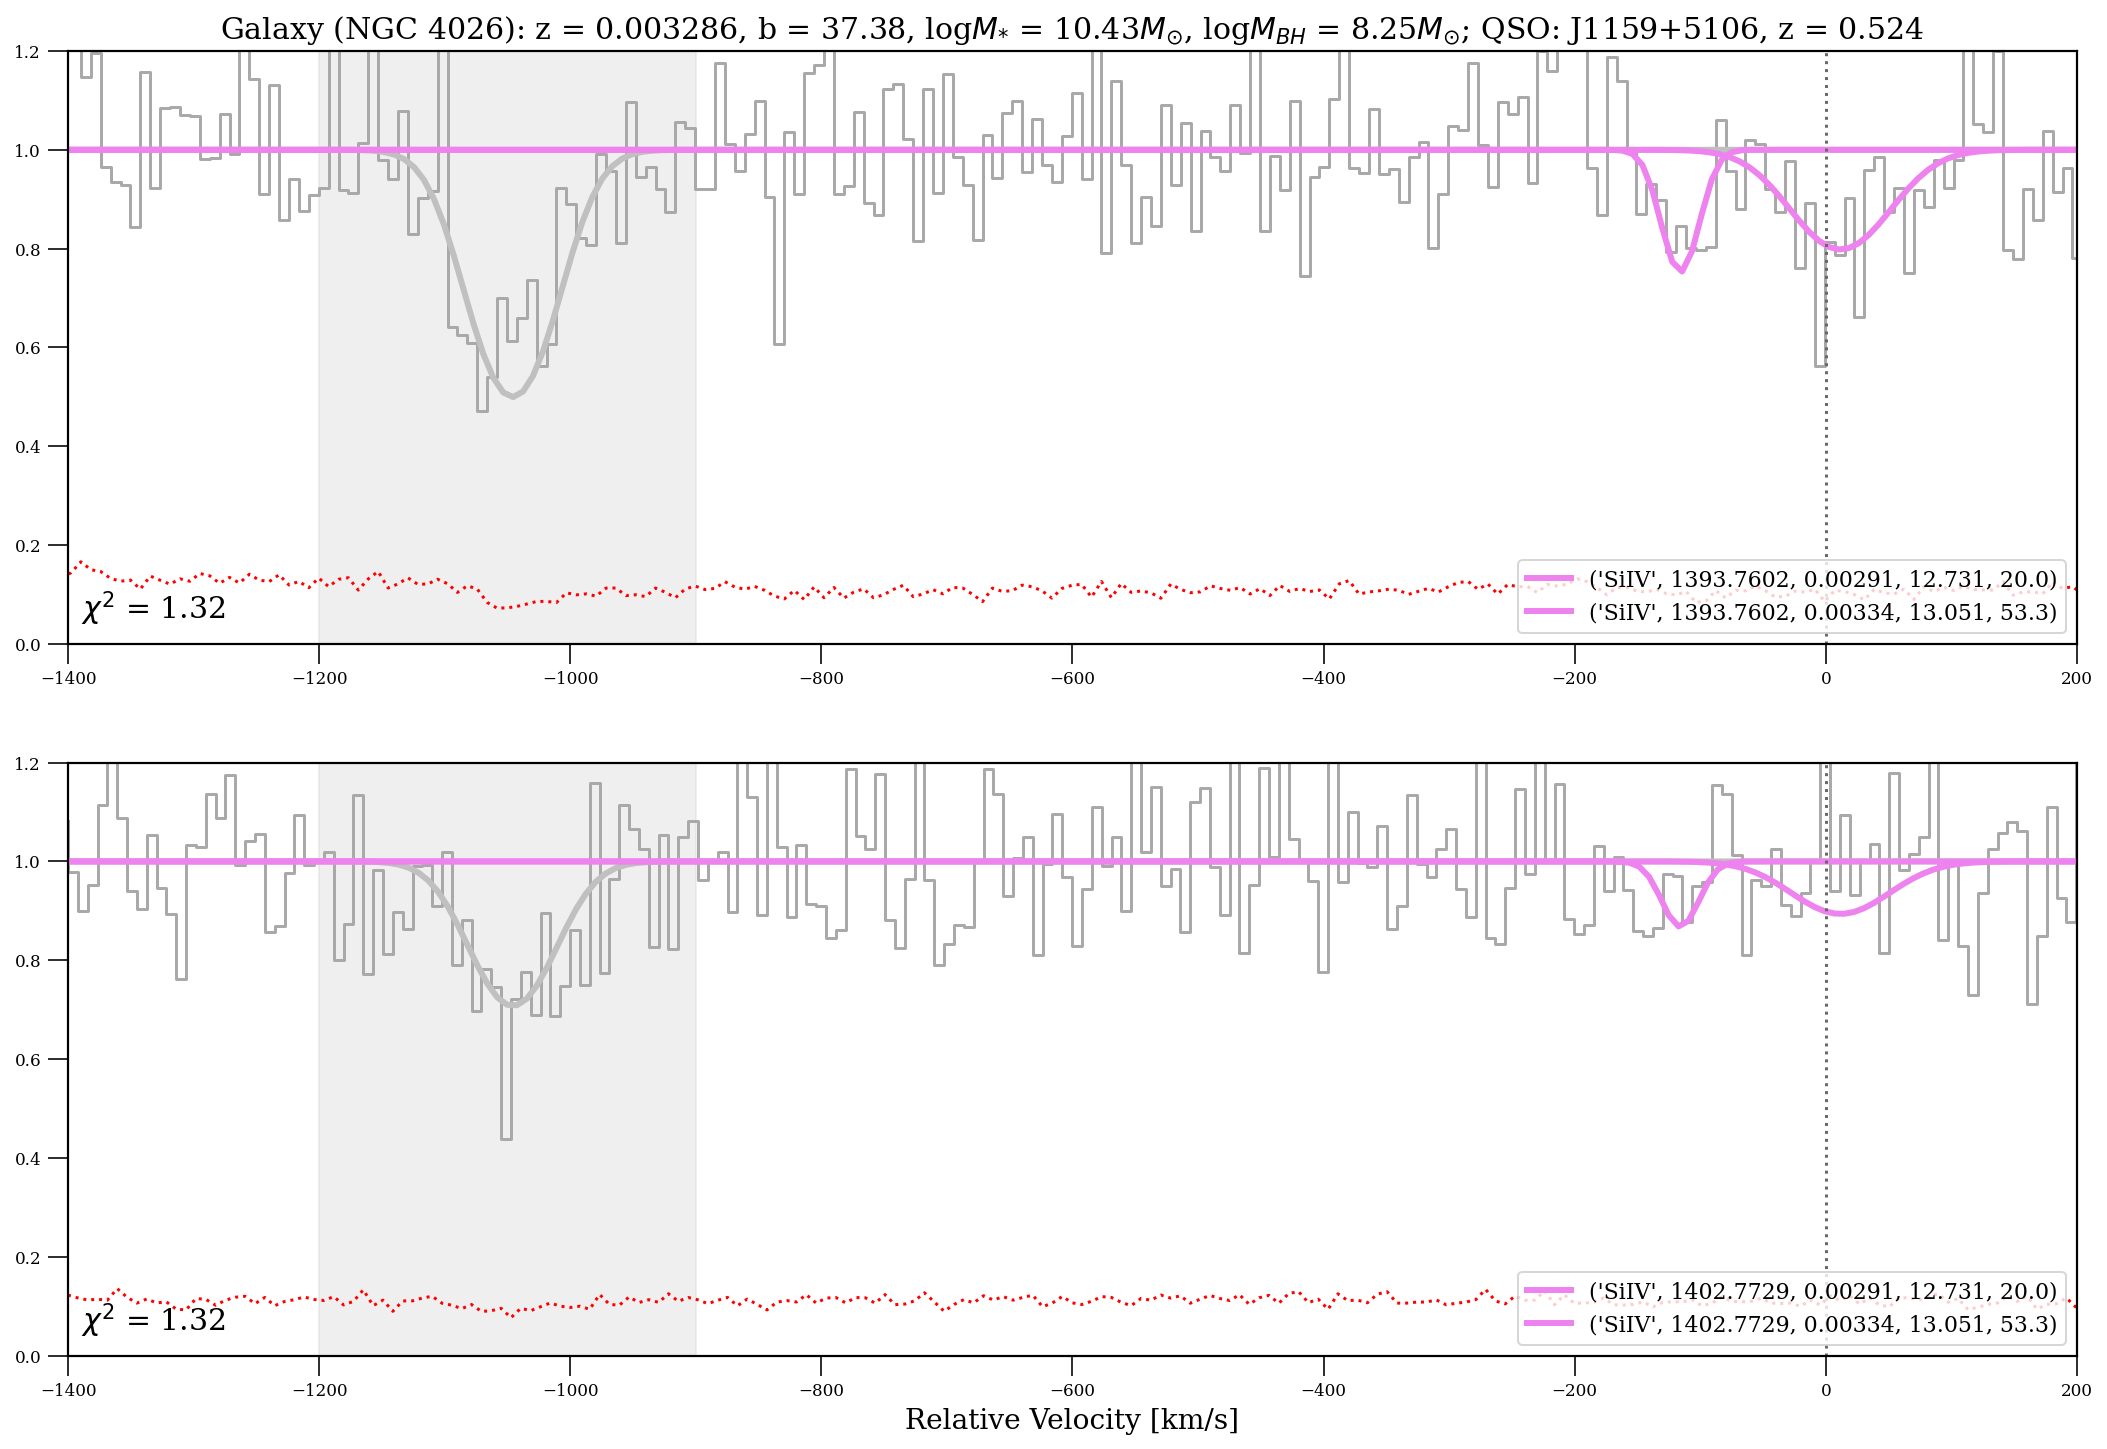

In [36]:
# J1159 - Unsmoothed Spectra 
J1159_vsp(xspec_J1159, Vels_J1159, Voigt_J1159) 

In [23]:
#J1222_vsp(xspec_J1222, Vels_J1222, Voigt_J1222)

In [24]:
# J1249 - Unsmoothed Spectra 
#J1249_vsp(xspec_J1249, Vels_J1249, Voigt_J1249) 

In [40]:
#################################################################

#J1051
def J1051_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #SiIV 1393 (0, 2, 4)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-1700, -1250, alpha = 0.35, color = 'lightgrey')
    axs[0].plot(Vels[0]+vel_J1051[0], Voigt[0].flux, c='violet', lw=3, label = labels_J1051[0])  
    axs[0].plot(Vels[2]+vel_J1051[2], Voigt[2].flux, c='violet', lw=3, label = labels_J1051[2]) 
    axs[0].plot(Vels[4]+vel_J1051[4], Voigt[4].flux, c='silver', lw=3) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-1800,200)
    axs[0].set_ylim(0,1.2)
    axs[0].set_title('Galaxy (NGC 3414): z = 0.0049, b = 40.499, log$M_{*}$ = 10.8$M_{\odot}$, log$M_{BH}$ = 8.40$M_{\odot}$; QSO: J1051+2805, z = 0.423', fontsize=15)
    axs[0].annotate('$\chi^{2}$ = 1.94', (-1790, 0.05), fontsize=15)
    axs[0].legend(loc=4)

    #SiIV 1402 (1, 3, 5)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-1700, -1250, alpha = 0.35, color = 'lightgrey')
    axs[1].plot(Vels[1]+vel_J1051[1], Voigt[1].flux, c='violet', lw=3, label = labels_J1051[1])
    axs[1].plot(Vels[3]+vel_J1051[3], Voigt[3].flux, c='violet', lw=3, label = labels_J1051[3])
    axs[1].plot(Vels[5]+vel_J1051[5], Voigt[5].flux, c='silver', lw=3)
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-1800,200)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4)
    axs[1].annotate('$\chi^{2}$ = 1.94', (-1790, 0.05), fontsize=15)
    axs[1].set_xlabel('Relative Velocity [km/s]')
    
#################################################################

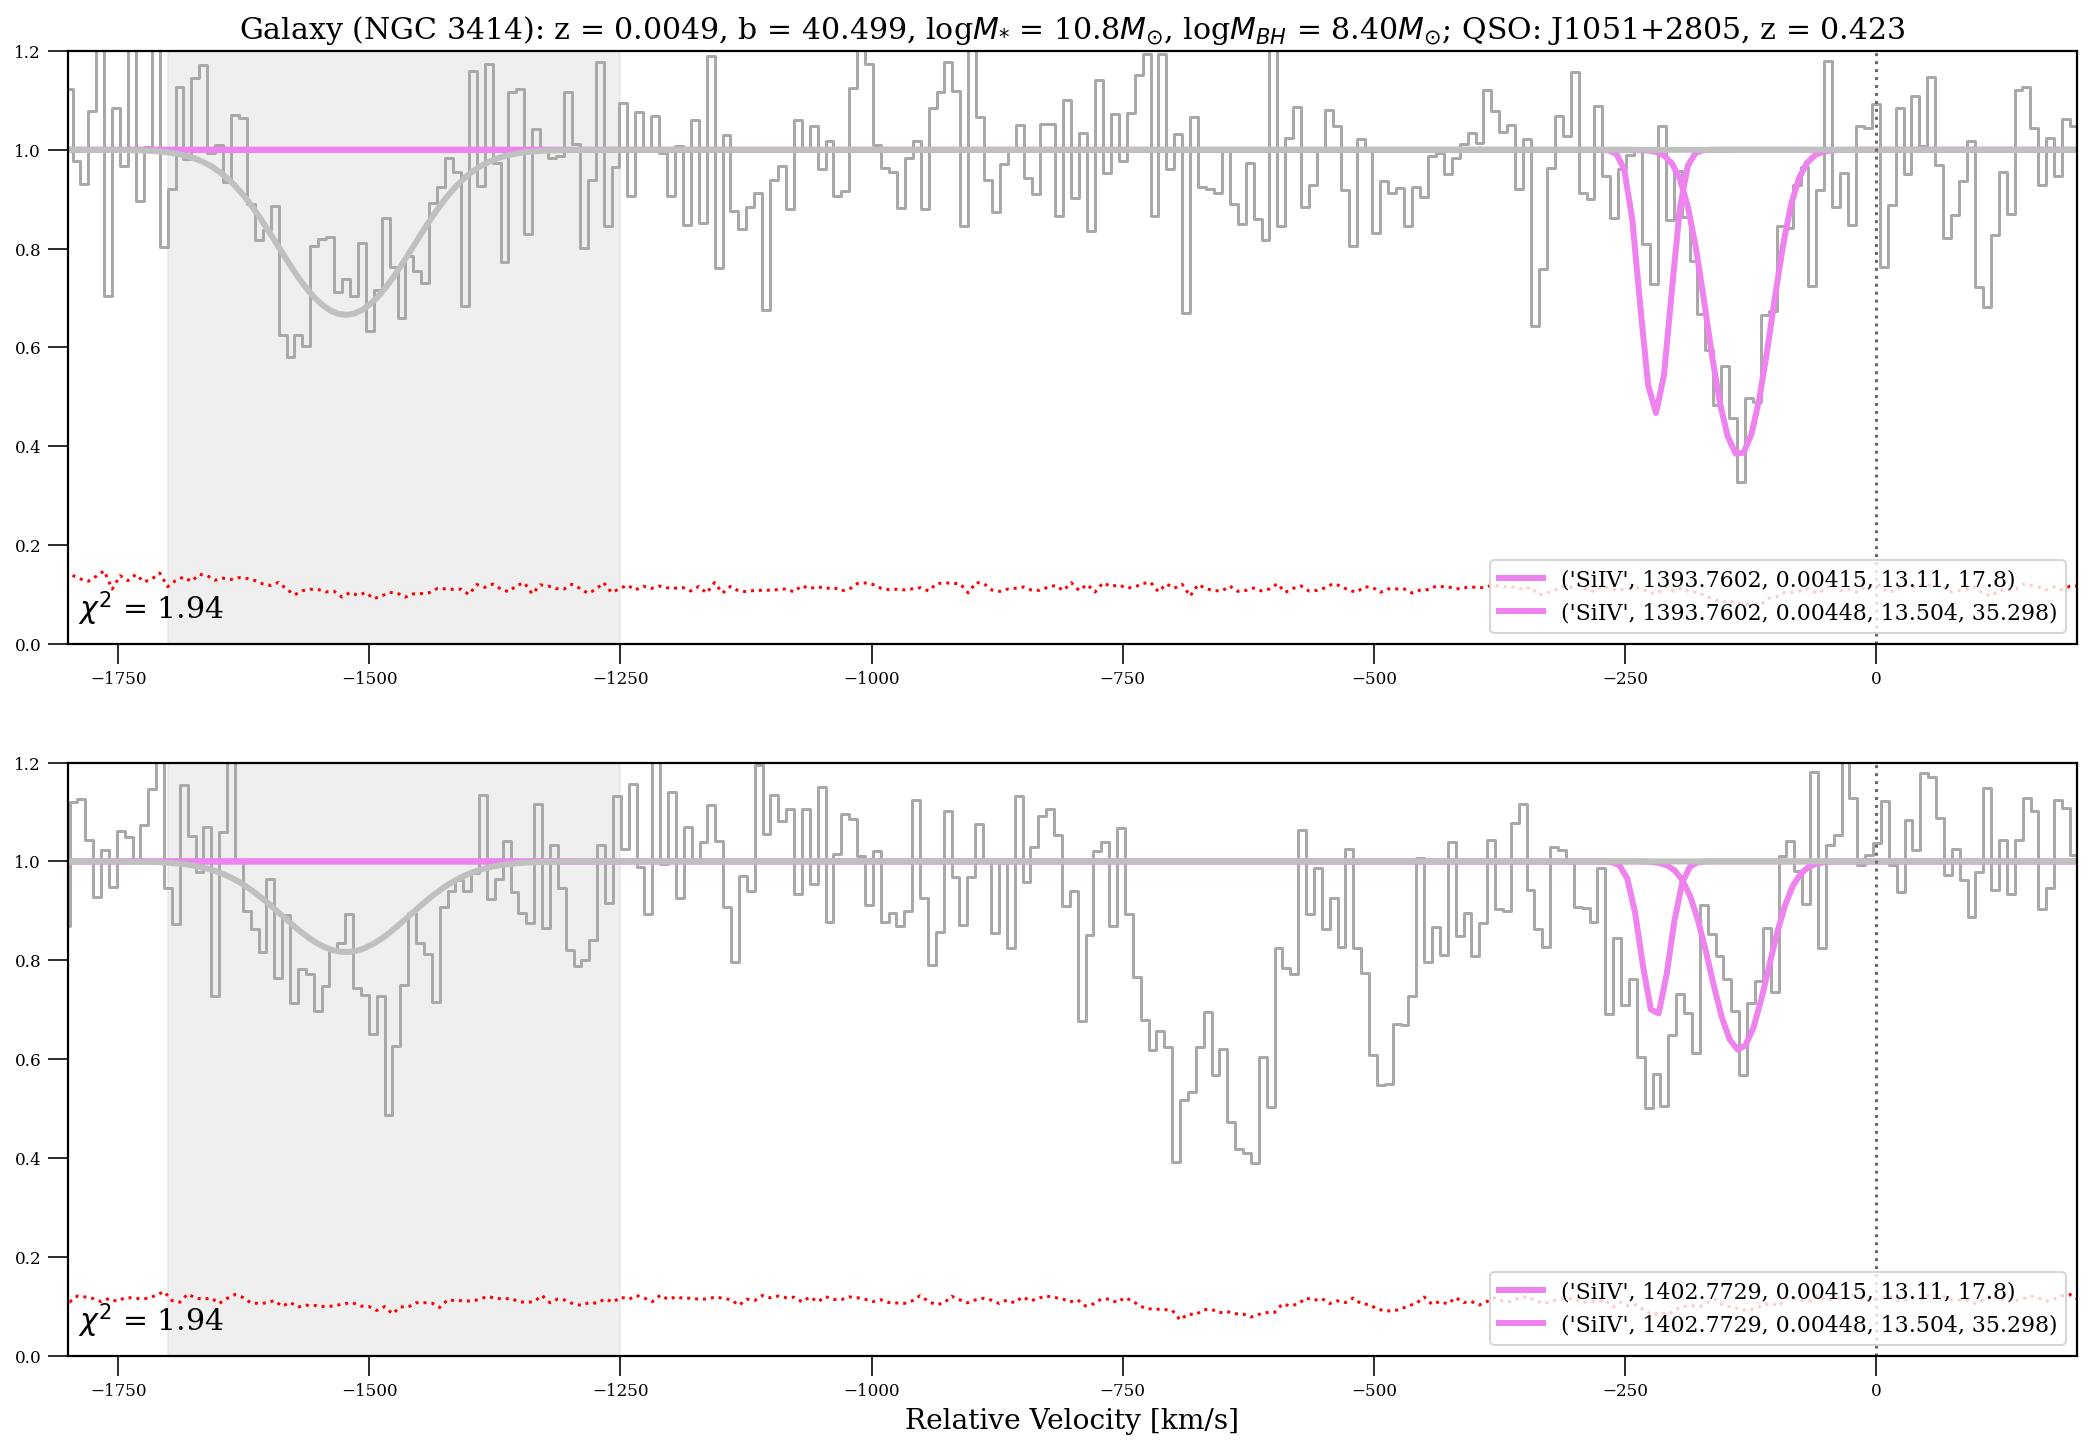

In [41]:
# J1051 - Unsmoothed Spectra 
J1051_vsp(xspec_J1051, Vels_J1051, Voigt_J1051) #one of the features is not plotting, need to look into that 

In [26]:
# J1123 - Unsmoothed Spectra 
#J1123_vsp(xspec_J1123, Vels_J1123, Voigt_J1123) 

In [27]:
# J0246 - Unsmoothed Spectra 
#J0246_vsp(xspec_J0246, Vels_J0246, Voigt_J0246) #some fourth one is not plotting 

In [28]:
# J1235 - Unsmoothed Spectra 
#J1235_vsp(xspec_J1235, Vels_J1235, Voigt_J1235)